## **<font style="color:rgb(134,19,348)">Deepface</font>**


<!-- https://pypi.org/project/deepface/0.0.89/ -->
<!-- https://sefiks.com/2020/05/01/a-gentle-introduction-to-face-recognition-in-deep-learning/ -->


Deepface is a lightweight face recognition and facial attribute analysis (age, gender, emotion and race) framework for python. It is a hybrid face recognition framework wrapping state-of-the-art models: *`VGG-Face, Google FaceNet, OpenFace, Facebook DeepFace, DeepID, ArcFace, Dlib, SFace and GhostFaceNet`*.

Experiments show that human beings have 97.53% accuracy on facial recognition tasks whereas those models already reached and passed that accuracy level.

If you run face recognition with DeepFace, you get access to a set of features: 

- `Face Verification:` The task of face verification refers to comparing a face with another to verify if it is a match or not. Hence, face verification is commonly used to compare a candidate’s face to another. This can be used to confirm that a physical face matches the one in an ID document. 

- `Face Recognition:` The task refers to finding a face in an image database. Performing face recognition requires running face verification many times. 

- `Facial Attribute Analysis:` The task of facial attribute analysis refers to describing the visual properties of face images. Accordingly, facial attributes analysis is used to extract attributes such as age, gender classification, emotion analysis, or race/ethnicity prediction. 

- `Real-Time Face Analysis:` This feature includes testing face recognition and facial attribute analysis with the real-time video feed of your webcam. 

Next, I will explain how to perform those deep face recognition tasks with DeepFace.  


<!-- **`Facial Recognition:`** -->
A modern face recognition pipeline consists of 5 common stages: *`detect, align, normalize, represent and verify`*. While Deepface handles all these common stages in the background, you don’t need to acquire in-depth knowledge about all the processes behind it. You can just call its verification, find or analysis function with a single line of code.


In [1]:
# env_9_3 venv
import numpy as np
import matplotlib.pyplot as  plt
import cv2
from deepface import DeepFace

**`Face Verification`**

This function verifies face pairs as same person or different persons. It expects exact image paths as inputs. Passing numpy or base64 encoded images is also welcome. Then, it is going to return a dictionary and you should check just its verified key.

In [ ]:
img_path1 = "data\\01_raw_data\\bibek_face.jpg"
img_path2 = "data\\01_raw_data\\bibek_face2.jpg"
# data\01_raw_data\bibek_face.jpg

verfication = DeepFace.verify(img1_path=img_path1, img2_path=img_path2)
verfication

In [ ]:
face1_boundary = verfication['facial_areas']['img1']
face2_boundary = verfication['facial_areas']['img2']

face1_boundary, face2_boundary

Face recognition requires applying face verification many times. Herein, deepface has an out-of-the-box find function to handle this action. It's going to look for the identity of input image in the database path and it will return list of pandas data frame as output. Meanwhile, facial embeddings of the facial database are stored in a pickle file to be searched faster in next time. Result is going to be the size of faces appearing in the source image. Besides, target images in the database can have many faces as well.

In [ ]:
dfs = DeepFace.find(img_path = img_path1, db_path = "data\\faces")

In [ ]:
dfs

**`Embeddings`**

Face recognition models basically represent facial images as multi-dimensional vectors. Sometimes, you need those embedding vectors directly. DeepFace comes with a dedicated representation function. Represent function returns a list of embeddings. Result is going to be the size of faces appearing in the image path.

In [ ]:
embedding_objs = DeepFace.represent(img_path = img_path1)
embedding = embedding_objs[0]["embedding"]
len(embedding)

**`Face recognition models`**

Deepface is a hybrid face recognition package. It currently wraps many state-of-the-art face recognition models: VGG-Face , FaceNet, OpenFace, DeepFace, DeepID, ArcFace, Dlib, SFace and GhostFaceNet. The default configuration uses VGG-Face model.

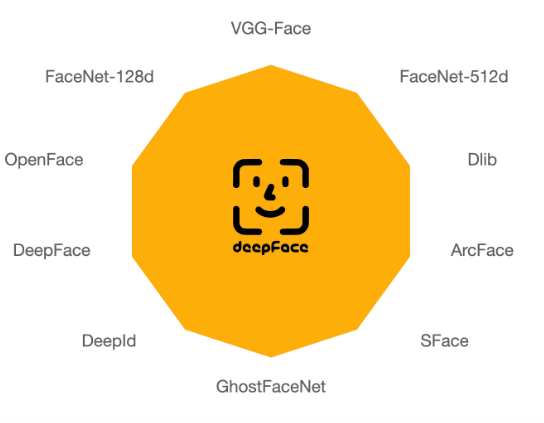

In [ ]:
models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
  "DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
  "GhostFaceNet",
]

#face verification
result = DeepFace.verify(img1_path = img_path1, 
      img2_path = img_path2, 
      model_name = models[0]
)

#face recognition
dfs = DeepFace.find(img_path = img_path1,
      db_path = "data\\faces", 
      model_name = models[1]
)

#embeddings
embedding_objs = DeepFace.represent(img_path = img_path1, 
      model_name = models[2]
)

**`Similarity`**

Face recognition models are regular convolutional neural networks and they are responsible to represent faces as vectors. We expect that a face pair of same person should be more similar than a face pair of different persons.

Similarity could be calculated by different metrics such as Cosine Similarity, Euclidean Distance and L2 form. The default configuration uses cosine similarity.

In [10]:
metrics = ["cosine", "euclidean", "euclidean_l2"]

#face verification
result = DeepFace.verify(img1_path = img_path1, 
          img2_path = img_path2, 
          distance_metric = metrics[1]
)

In [ ]:
img1 =  cv2.imread(img_path1)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

plt.imshow(img1)
plt.axis('off')
plt.show()


In [ ]:
img2 =  cv2.imread(img_path2)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.imshow(img2)
plt.axis('off')
plt.show()